In [20]:
import featuretools as ft

data = ft.demo.load_mock_customer()
transactions_df = data["transactions"].merge(data["sessions"]).merge(data["customers"])

transactions_df.sample(10)

,transaction_id,session_id,transaction_time,product_id,amount,customer_id,device,session_start,zip_code,join_date,birthday
264,380,21,2014-01-01 05:14:10,5,57.09,4,desktop,2014-01-01 05:02:15,60091,2011-04-08 20:08:14,2006-08-15
19,244,10,2014-01-01 02:34:55,2,116.95,2,tablet,2014-01-01 02:31:40,13244,2012-04-15 23:31:04,1986-08-18
314,299,6,2014-01-01 01:32:05,4,64.99,1,tablet,2014-01-01 01:23:25,60091,2011-04-17 10:48:33,1994-07-18
290,78,4,2014-01-01 00:54:10,1,37.50,1,mobile,2014-01-01 00:44:25,60091,2011-04-17 10:48:33,1994-07-18
379,457,27,2014-01-01 06:37:35,1,19.16,1,mobile,2014-01-01 06:34:20,60091,2011-04-17 10:48:33,1994-07-18
335,477,9,2014-01-01 02:30:35,3,41.70,1,desktop,2014-01-01 02:15:25,60091,2011-04-17 10:48:33,1994-07-18
293,103,4,2014-01-01 00:57:25,5,20.79,1,mobile,2014-01-01 00:44:25,60091,2011-04-17 10:48:33,1994-07-18
271,390,22,2014-01-01 05:21:45,2,54.83,4,desktop,2014-01-01 05:21:45,60091,2011-04-08 20:08:14,2006-08-15
404,476,29,2014-01-01 07:24:10,4,121.59,1,mobile,2014-01-01 07:10:05,60091,2011-04-17 10:48:33,1994-07-18
179,90,3,2014-01-01 00:35:45,1,75.73,4,mobile,2014-01-01 00:28:10,60091,2011-04-08 20:08:14,2006-08-15


In [21]:
products_df = data["products"]
products_df

,product_id,brand
0,1,B
1,2,B
2,3,B
3,4,B
4,5,A


## Add dataframe with index, time_index and logical_types

In [22]:
es = ft.EntitySet(id="customer_data")
from woodwork.logical_types import Categorical, PostalCode
es = es.add_dataframe(
    dataframe_name="transactions",
    dataframe=transactions_df,
    index="transaction_id",   # unique key
    time_index="transaction_time",  # when data was created
    logical_types={
        "product_id": Categorical, # indicates that "product_id" should be interpreted as a Categorical column, even though it is just an INTEGER in the underlying data.
        "zip_code": PostalCode   # interpreted as Postal Code
    },
)

es

Entityset: customer_data
  DataFrames:
    transactions [Rows: 500, Columns: 11]
  Relationships:
    No relationships

We can also use a SETTER on the **EntitySet** Object to add dataframes
```python
es["transactions"] = transactions_df
```


## Show Schema

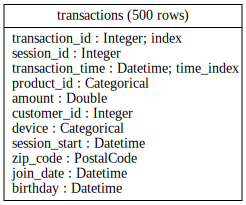

In [23]:
es.plot()

In [24]:
es["transactions"].ww.schema

,Logical Type,Semantic Tag(s)
Column,,
transaction_id,Integer,['index']
session_id,Integer,['numeric']
transaction_time,Datetime,['time_index']
product_id,Categorical,['category']
amount,Double,['numeric']
customer_id,Integer,['numeric']
device,Categorical,['category']
session_start,Datetime,[]
zip_code,PostalCode,['category']


## Add Dataframe

In [25]:
es = es.add_dataframe(
    dataframe_name="products", dataframe=products_df, index="product_id"
)

es

Entityset: customer_data
  DataFrames:
    transactions [Rows: 500, Columns: 11]
    products [Rows: 5, Columns: 2]
  Relationships:
    No relationships

## Add Relationship

In [26]:
es.add_relationship("products", "product_id", "transactions", "product_id")
es # Note: child column name cannot be its index

Entityset: customer_data
  DataFrames:
    transactions [Rows: 500, Columns: 11]
    products [Rows: 5, Columns: 2]
  Relationships:
    transactions.product_id -> products.product_id

## Creating a dataframe from an existing table

In [27]:
es = es.normalize_dataframe(
    base_dataframe_name="transactions",
    new_dataframe_name="sessions",
    index="session_id",
    make_time_index="session_start",
    additional_columns=[
        "device",
        "customer_id",
        "zip_code",
        "session_start",
        "join_date",
    ],
)
es

"""
Did 2 operations:
1. created a new dataframe based on "session_id" and "session_start" in "transactions"
2. added a relationship connecting "transactions" and "sessions"
"""

'\nDid 2 operations:\n1. created a new dataframe based on "session_id" and "session_start" in "transactions"\n2. added a relationship connecting "transactions" and "sessions"\n'

In [28]:
es["sessions"]

,session_id,device,customer_id,zip_code,session_start,join_date
1,1,desktop,2,13244,2014-01-01 00:00:00,2012-04-15 23:31:04
2,2,mobile,5,60091,2014-01-01 00:17:20,2010-07-17 05:27:50
3,3,mobile,4,60091,2014-01-01 00:28:10,2011-04-08 20:08:14
4,4,mobile,1,60091,2014-01-01 00:44:25,2011-04-17 10:48:33
5,5,mobile,4,60091,2014-01-01 01:11:30,2011-04-08 20:08:14
6,6,tablet,1,60091,2014-01-01 01:23:25,2011-04-17 10:48:33
7,7,tablet,3,13244,2014-01-01 01:39:40,2011-08-13 15:42:34
8,8,tablet,4,60091,2014-01-01 01:55:55,2011-04-08 20:08:14
9,9,desktop,1,60091,2014-01-01 02:15:25,2011-04-17 10:48:33
10,10,tablet,2,13244,2014-01-01 02:31:40,2012-04-15 23:31:04


In [29]:
es["transactions"].ww.schema

,Logical Type,Semantic Tag(s)
Column,,
transaction_id,Integer,['index']
session_id,Integer,"['foreign_key', 'numeric']"
transaction_time,Datetime,['time_index']
product_id,Categorical,"['foreign_key', 'category']"
amount,Double,['numeric']
birthday,Datetime,[]


In [30]:
es["sessions"].ww.schema

,Logical Type,Semantic Tag(s)
Column,,
session_id,Integer,['index']
device,Categorical,['category']
customer_id,Integer,['numeric']
zip_code,PostalCode,['category']
session_start,Datetime,['time_index']
join_date,Datetime,[]


### It did Two More Operations Automatically
1. It removed “device”, “customer_id”, “zip_code” and “join_date” from “transactions” and created new columns in the sessions dataframe. This reduces redundant information as the those properties of a session don’t change between transactions.
2. It copied and marked “session_start” as a time index column into the new sessions dataframe to indicate the beginning of a session. If the base dataframe has a time index and `make_time_index` is not set, `normalize_dataframe` will create a time index for the new dataframe. In this case it would create a new time index called “first_transactions_time” using the time of the first transaction of each session. If we don’t want this time index to be created, we can set `make_time_index=False`.

In [31]:
es["sessions"].head(5)

,session_id,device,customer_id,zip_code,session_start,join_date
1,1,desktop,2,13244,2014-01-01 00:00:00,2012-04-15 23:31:04
2,2,mobile,5,60091,2014-01-01 00:17:20,2010-07-17 05:27:50
3,3,mobile,4,60091,2014-01-01 00:28:10,2011-04-08 20:08:14
4,4,mobile,1,60091,2014-01-01 00:44:25,2011-04-17 10:48:33
5,5,mobile,4,60091,2014-01-01 01:11:30,2011-04-08 20:08:14


In [32]:
es["transactions"].head(5)

,transaction_id,session_id,transaction_time,product_id,amount,birthday
298,298,1,2014-01-01 00:00:00,5,127.64,1986-08-18
2,2,1,2014-01-01 00:01:05,2,109.48,1986-08-18
308,308,1,2014-01-01 00:02:10,3,95.06,1986-08-18
116,116,1,2014-01-01 00:03:15,4,78.92,1986-08-18
371,371,1,2014-01-01 00:04:20,3,31.54,1986-08-18


In [33]:
es = es.normalize_dataframe(
    base_dataframe_name="sessions",
    new_dataframe_name="customers",
    index="customer_id",
    make_time_index="join_date",
    additional_columns=["zip_code", "join_date"],
)

es

Entityset: customer_data
  DataFrames:
    transactions [Rows: 500, Columns: 6]
    products [Rows: 5, Columns: 2]
    sessions [Rows: 35, Columns: 4]
    customers [Rows: 5, Columns: 3]
  Relationships:
    transactions.product_id -> products.product_id
    transactions.session_id -> sessions.session_id
    sessions.customer_id -> customers.customer_id

## Ready to Use!!

In [34]:
feature_matrix, feature_defs = ft.dfs(entityset=es, target_dataframe_name="products")

feature_matrix

,COUNT(transactions),MAX(transactions.amount),MEAN(transactions.amount),MIN(transactions.amount),SKEW(transactions.amount),STD(transactions.amount),SUM(transactions.amount),MODE(transactions.DAY(birthday)),MODE(transactions.DAY(transaction_time)),MODE(transactions.MONTH(birthday)),...,MODE(transactions.sessions.device),NUM_UNIQUE(transactions.DAY(birthday)),NUM_UNIQUE(transactions.DAY(transaction_time)),NUM_UNIQUE(transactions.MONTH(birthday)),NUM_UNIQUE(transactions.MONTH(transaction_time)),NUM_UNIQUE(transactions.WEEKDAY(birthday)),NUM_UNIQUE(transactions.WEEKDAY(transaction_time)),NUM_UNIQUE(transactions.YEAR(birthday)),NUM_UNIQUE(transactions.YEAR(transaction_time)),NUM_UNIQUE(transactions.sessions.device)
product_id,,,,,,,,,,,,,,,,,,,,,
1,102,149.56,73.429314,6.84,0.125525,42.479989,7489.79,18,1,7,...,desktop,4,1,3,1,4,1,5,1,3
2,92,149.95,76.319891,5.73,0.151934,46.336308,7021.43,18,1,8,...,desktop,4,1,3,1,4,1,5,1,3
3,96,148.31,73.001250,5.89,0.223938,38.871405,7008.12,18,1,8,...,desktop,4,1,3,1,4,1,5,1,3
4,106,146.46,76.311038,5.81,-0.132077,42.492501,8088.97,18,1,7,...,desktop,4,1,3,1,4,1,5,1,3
5,104,149.02,76.264904,5.91,0.098248,42.131902,7931.55,18,1,7,...,mobile,4,1,3,1,4,1,5,1,3


# DFS

In [1]:
import featuretools as ft

es = ft.demo.load_mock_customer(return_entityset=True)
es

Entityset: transactions
  DataFrames:
    transactions [Rows: 500, Columns: 6]
    products [Rows: 5, Columns: 3]
    sessions [Rows: 35, Columns: 5]
    customers [Rows: 5, Columns: 5]
  Relationships:
    transactions.product_id -> products.product_id
    transactions.session_id -> sessions.session_id
    sessions.customer_id -> customers.customer_id

In [7]:
es["customers"]

,customer_id,zip_code,join_date,birthday,_ft_last_time
5,5,60091,2010-07-17 05:27:50,1984-07-28,2014-01-01 08:09:40
4,4,60091,2011-04-08 20:08:14,2006-08-15,2014-01-01 05:31:30
1,1,60091,2011-04-17 10:48:33,1994-07-18,2014-01-01 07:26:20
3,3,13244,2011-08-13 15:42:34,2003-11-21,2014-01-01 09:00:35
2,2,13244,2012-04-15 23:31:04,1986-08-18,2014-01-01 08:23:45


## DFS Primitives

In [6]:
feature_matrix, feature_defs = ft.dfs(
    entityset=es,
    target_dataframe_name="customers",
    agg_primitives=["count"],
    trans_primitives=["month"],
    max_depth=1,
)
feature_matrix

,zip_code,COUNT(sessions),MONTH(birthday),MONTH(join_date)
customer_id,,,,
5,60091,6,7,7
4,60091,8,8,4
1,60091,8,7,4
3,13244,6,11,8
2,13244,7,8,4


## DFS Depth

In [15]:
feature_matrix, feature_defs = ft.dfs(
    entityset=es,
    target_dataframe_name="customers",
    agg_primitives=["mean", "sum", "mode"],
    trans_primitives=["month", "hour"],
    max_depth=2,
)
feature_matrix

,zip_code,MODE(sessions.device),MEAN(transactions.amount),MODE(transactions.product_id),SUM(transactions.amount),HOUR(birthday),HOUR(join_date),MONTH(birthday),MONTH(join_date),MEAN(sessions.MEAN(transactions.amount)),MEAN(sessions.SUM(transactions.amount)),MODE(sessions.HOUR(session_start)),MODE(sessions.MODE(transactions.product_id)),MODE(sessions.MONTH(session_start)),SUM(sessions.MEAN(transactions.amount)),MODE(transactions.sessions.device)
customer_id,,,,,,,,,,,,,,,,
5,60091,mobile,80.375443,5,6349.66,0,5,7,7,78.705187,1058.276667,0,3,1,472.231119,mobile
4,60091,mobile,80.070459,2,8727.68,0,20,8,4,81.207189,1090.960000,1,1,1,649.657515,mobile
1,60091,mobile,71.631905,4,9025.62,0,10,7,4,72.774140,1128.202500,6,4,1,582.193117,mobile
3,13244,desktop,67.060430,1,6236.62,0,15,11,8,67.539577,1039.436667,5,1,1,405.237462,desktop
2,13244,desktop,77.422366,4,7200.28,0,23,8,4,78.415122,1028.611429,3,3,1,548.905851,desktop


In [16]:
feature_matrix.columns

Index(['zip_code', 'MODE(sessions.device)', 'MEAN(transactions.amount)',
       'MODE(transactions.product_id)', 'SUM(transactions.amount)',
       'HOUR(birthday)', 'HOUR(join_date)', 'MONTH(birthday)',
       'MONTH(join_date)', 'MEAN(sessions.MEAN(transactions.amount))',
       'MEAN(sessions.SUM(transactions.amount))',
       'MODE(sessions.HOUR(session_start))',
       'MODE(sessions.MODE(transactions.product_id))',
       'MODE(sessions.MONTH(session_start))',
       'SUM(sessions.MEAN(transactions.amount))',
       'MODE(transactions.sessions.device)'],
      dtype='object')

## DFS Change Target

In [17]:
feature_matrix, feature_defs = ft.dfs(
    entityset=es,
    target_dataframe_name="sessions",
    agg_primitives=["mean", "sum", "mode"],
    trans_primitives=["month", "hour"],
    max_depth=2,
)
feature_matrix.head(5)

,customer_id,device,MEAN(transactions.amount),MODE(transactions.product_id),SUM(transactions.amount),HOUR(session_start),MONTH(session_start),customers.zip_code,MODE(transactions.HOUR(transaction_time)),MODE(transactions.MONTH(transaction_time)),customers.MODE(sessions.device),customers.MEAN(transactions.amount),customers.MODE(transactions.product_id),customers.SUM(transactions.amount),customers.HOUR(birthday),customers.HOUR(join_date),customers.MONTH(birthday),customers.MONTH(join_date)
session_id,,,,,,,,,,,,,,,,,,
1,2,desktop,76.813125,3,1229.01,0,1,13244,0,1,desktop,77.422366,4,7200.28,0,23,8,4
2,5,mobile,74.696000,5,746.96,0,1,60091,0,1,mobile,80.375443,5,6349.66,0,5,7,7
3,4,mobile,88.600000,1,1329.00,0,1,60091,0,1,mobile,80.070459,2,8727.68,0,20,8,4
4,1,mobile,64.557200,5,1613.93,0,1,60091,0,1,mobile,71.631905,4,9025.62,0,10,7,4
5,4,mobile,70.638182,5,777.02,1,1,60091,1,1,mobile,80.070459,2,8727.68,0,20,8,4
